# IoT-Botnet Cybersecurity Data¶

# Feature Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import itertools
import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [4]:
df = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\BoT-IoT\\CSV\\Traning and Testing Tets (5% of the entier dataset)\\10-best features\\10-best Training-Testing split\\UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')

In [5]:
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [6]:
df.tail()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP
2934816,96906,tcp,192.168.100.150,14302,192.168.100.3,80,95429,0.053820,100,0.064767,1,0.118588,100,0.038796,0.116388,0.172408,1,DoS,TCP


In [7]:
df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [8]:
df['attack_label'] = 0

In [9]:
for i in range(len(df)):
    if df['subcategory'][i] != 'UDP':
        df['attack_label'][i] = 1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
 19  attack_label       int64  
dtypes: float64(6), int64(7), object(7)
memory usage: 447.8+ MB


In [11]:
df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,attack_label
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01,4.600515e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02,4.984016e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00,0.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00,0.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00,1.000000e+00


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pkSeqID,2934817.0,1.834209e+06,1.059058e+06,1.0,917109.000000,1.834316e+06,2.751250e+06,3.668522e+06
seq,2934817.0,1.212973e+05,7.578700e+04,1.0,54847.000000,1.177370e+05,1.848700e+05,2.622110e+05
stddev,2934817.0,8.869639e-01,8.036391e-01,0.0,0.029997,7.925750e-01,1.745220e+00,2.496763e+00
N_IN_Conn_P_SrcIP,2934817.0,8.254997e+01,2.439019e+01,1.0,69.000000,1.000000e+02,1.000000e+02,1.000000e+02
min,2934817.0,1.017208e+00,1.483551e+00,0.0,0.000000,0.000000e+00,2.147949e+00,4.980471e+00
state_number,2934817.0,3.134219e+00,1.187107e+00,1.0,3.000000,4.000000e+00,4.000000e+00,1.100000e+01
mean,2934817.0,2.230471e+00,1.517766e+00,0.0,0.181934,2.689973e+00,3.565061e+00,4.981882e+00
N_IN_Conn_P_DstIP,2934817.0,9.245766e+01,1.816651e+01,1.0,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
drate,2934817.0,4.303064e-01,5.623304e+01,0.0,0.000000,0.000000e+00,0.000000e+00,5.882353e+04
srate,2934817.0,3.128290e+00,7.845494e+02,0.0,0.155845,2.837800e-01,4.880000e-01,1.000000e+06


In [13]:
df['subcategory'].value_counts()

UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: subcategory, dtype: int64

In [14]:
df['proto'].value_counts()

udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: proto, dtype: int64

In [15]:
df.corr()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,attack_label
pkSeqID,1.000000,-0.027136,0.162617,-0.034084,0.285961,0.202782,0.398544,0.344883,0.012629,0.005549,0.349825,-0.018480,-0.247338
seq,-0.027136,1.000000,0.071785,0.066903,0.016441,0.051894,0.059093,0.052820,-0.011199,-0.004691,0.072290,0.016659,-0.067002
stddev,0.162617,0.071785,1.000000,0.041382,-0.375931,0.339865,0.350581,0.040469,-0.008364,-0.003818,0.668193,0.011872,-0.412990
N_IN_Conn_P_SrcIP,-0.034084,0.066903,0.041382,1.000000,0.028413,0.036031,0.061703,0.575716,-0.008289,-0.005509,0.065151,0.028637,-0.088019
min,0.285961,0.016441,-0.375931,0.028413,1.000000,0.275102,0.694039,0.103538,-0.005078,-0.002126,0.427138,0.005226,-0.349599
state_number,0.202782,0.051894,0.339865,0.036031,0.275102,1.000000,0.571467,-0.047885,-0.003675,-0.004353,0.565148,0.002701,-0.790099
mean,0.398544,0.059093,0.350581,0.061703,0.694039,0.571467,1.000000,0.120107,-0.011026,-0.004828,0.908659,0.012848,-0.719619
N_IN_Conn_P_DstIP,0.344883,0.052820,0.040469,0.575716,0.103538,-0.047885,0.120107,1.000000,-0.003527,-0.004412,0.101192,0.052049,0.019789
drate,0.012629,-0.011199,-0.008364,-0.008289,-0.005078,-0.003675,-0.011026,-0.003527,1.000000,0.036855,-0.012199,-0.002730,0.008290
srate,0.005549,-0.004691,-0.003818,-0.005509,-0.002126,-0.004353,-0.004828,-0.004412,0.036855,1.000000,-0.005418,-0.096710,0.003659


In [16]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2934812    False
2934813    False
2934814    False
2934815    False
2934816    False
Length: 2934817, dtype: bool

In [17]:
df.drop_duplicates()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,attack_label
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP,0
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP,1
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP,1
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP,0
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP,0
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP,0
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP,0
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP,1


In [18]:
X_train = df.drop(['proto','saddr','sport','daddr','dport','attack','category','subcategory','attack_label'],axis=1)
y_train = df['attack_label']

In [19]:
X_train

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,3142762,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619
1,2432264,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924
2,1976315,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205
3,1240757,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302
4,3257991,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452
...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047
2934813,3384621,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534
2934814,775893,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615
2934815,443484,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000


In [20]:
y_train

0          0
1          1
2          1
3          0
4          0
          ..
2934812    0
2934813    0
2934814    0
2934815    1
2934816    1
Name: attack_label, Length: 2934817, dtype: int64

In [21]:
df1 = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\BoT-IoT\\CSV\\Traning and Testing Tets (5% of the entier dataset)\\10-best features\\10-best Training-Testing split\\UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

In [22]:
df1['attack_label'] = 0

In [23]:
for i in range(len(df1)):
    if df1['subcategory'][i] != 'UDP':
        df1['attack_label'][i] = 1

In [24]:
X_test= df1.drop(['proto','saddr','sport','daddr','dport','attack','category','subcategory','attack_label'],axis=1)
y_test = df1['attack_label']

In [25]:
X_test

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,792371,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,2056418,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,2795650,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,2118009,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,303688,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628
...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432
733701,2787099,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634
733702,2255382,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142
733703,588946,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000


In [26]:
y_test 

0         0
1         1
2         0
3         1
4         1
         ..
733700    0
733701    0
733702    1
733703    1
733704    1
Name: attack_label, Length: 733705, dtype: int64

In [27]:
X = X_train
y = y_train

In [28]:
X.shape, y.shape

((2934817, 11), (2934817,))

# Information Gain

<AxesSubplot:>

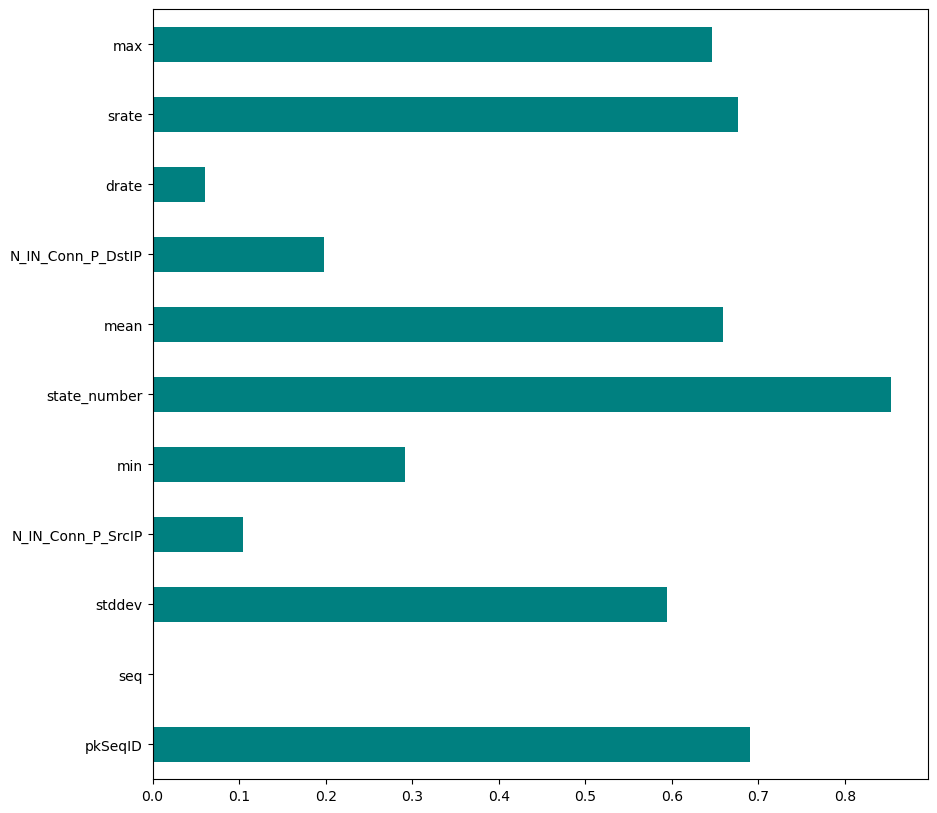

In [29]:
plt.figure(figsize = (10,10))

from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)

feat_importance = pd.Series(importance, X.columns[0: len(X.columns)])

feat_importance.plot(kind='barh', color='teal')